In [500]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle,Circle
from matplotlib.lines import Line2D
from wordcloud import WordCloud
import random

Read data 

In [483]:
df = pd.read_csv('./labeled_descriptions.csv', encoding='latin-1')
df = df.dropna()
df.head()

,out,text
0,0.0,"You are as unique as your background, experien..."
1,1.0,other requirements related to customer data\nW...
2,0.0,Overview\nThis is an exciting opportunity to j...
3,1.0,Job Requirements\ná Bachelor's degree in Engin...
4,0.0,"At EY, youÕll have the chance to build a caree..."


In [484]:
def cleanse(row):
    row_clean = row.replace("\n", " ")
    row_clean = row.replace("-", " ")
    row_clean = re.sub("[.!?/\()-,]", "",row_clean)
    return row_clean


Obtain word count using dictionary methods

In [485]:
def text_count(df,target):
    text_dict = {}
    for row in df.iterrows():
        if(row[1][0] == target):
            row_clean = cleanse(row[1][1])
            
            text = row_clean.split(" ")
            for word in text:
                if word.lower() not in text_dict.keys():
                    text_dict.update({f"{word.lower()}":1})
                else:
                    text_dict[f"{word.lower()}"]+=1

    return text_dict

text_dict_qual = text_count(df,1)

text_dict_desc = text_count(df,0)

Obtain word count as a dataframe

In [486]:
word_count_qual = pd.DataFrame(text_dict_qual,index = [0]).rename(index = {0:'Word_Count'}).transpose()
word_count_qual=word_count_qual.sort_values(by=word_count_qual.columns[0],ascending=False)

word_count_desc = pd.DataFrame(text_dict_desc,index = [0]).rename(index = {0:'Word_Count'}).transpose()
word_count_desc=word_count_desc.sort_values(by=word_count_desc.columns[0],ascending=False)

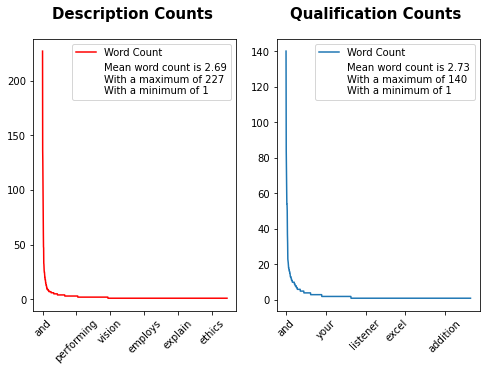

In [487]:
def plot_word_count(word_count_qual,word_count_desc, subset_description = ''):
    fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8, 5))
    custom_lines_1 = [Line2D([0], [0], lw=1.5,color = 'red'),Line2D([0], [0], lw=4, alpha=0)]


    word_count_desc.plot(ax = ax1, rot=45,color = 'red')
    ax1.set_title(f"Description Counts {subset_description}",pad=20,fontdict = {'fontsize' : 15,'fontweight':1000})
    ax1.legend(custom_lines_1,[f'Word Count',f'Mean word count is {word_count_desc.mean()[0]:.2f}\nWith a maximum of {word_count_desc.max()[0]:.0f} \nWith a minimum of {word_count_desc.min()[0]:.0f}'])
   

    custom_lines_2 = [Line2D([0], [0], lw=1.5),Line2D([0], [0], lw=4, alpha=0)]
    word_count_qual.plot(ax = ax2, rot=45,label = 'test')
    ax2.set_title(f"Qualification Counts {subset_description}",pad=20,fontdict = {'fontsize' : 15,'fontweight':1000})
    ax2.legend(custom_lines_2,[f'Word Count',f'Mean word count is {word_count_qual.mean()[0]:.2f}\nWith a maximum of {word_count_qual.max()[0]:.0f} \nWith a minimum of {word_count_qual.min()[0]:.0f}'])
   
    plt.show()


plot_word_count(word_count_qual,word_count_desc)

Seems like we have a very skewed dataset where only the top 75th percentile has over 1 count which makes sense. 

Will do some cleansing of deleting less used words and analyze


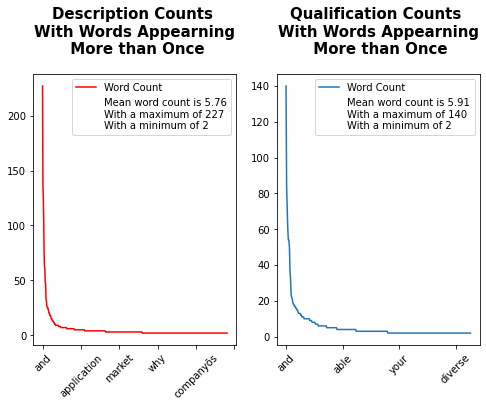

In [488]:
more_than_one_desc = word_count_desc[word_count_desc.Word_Count > 1]
more_than_one_qual = word_count_qual[word_count_qual.Word_Count > 1]
plot_word_count(more_than_one_qual,more_than_one_desc,subset_description="\nWith Words Appearning\n More than Once")

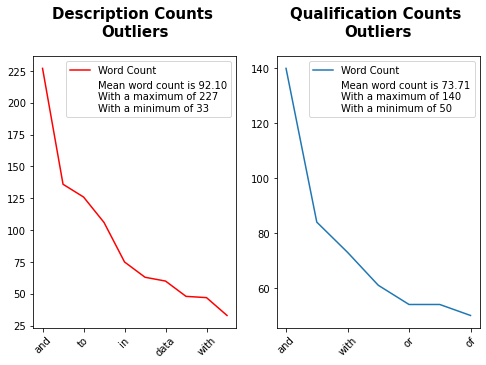

In [489]:
outliers_desc = more_than_one_desc[more_than_one_desc > more_than_one_desc.quantile( .98)[0]].dropna()
outliers_qual = more_than_one_qual[more_than_one_qual > more_than_one_qual.quantile( .98)[0]].dropna()
plot_word_count(outliers_qual,outliers_desc,subset_description='\nOutliers')

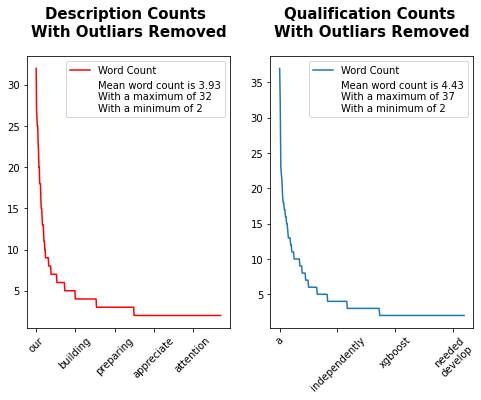

In [490]:
remove_out_desc = more_than_one_desc[more_than_one_desc < more_than_one_desc.quantile( .98)[0]].dropna()
remove_out_qual = more_than_one_qual[more_than_one_qual < more_than_one_qual.quantile( .98)[0]].dropna()
plot_word_count(remove_out_qual,remove_out_desc,subset_description="\nWith Outliars Removed")

Seems like the data is fairly good with words 

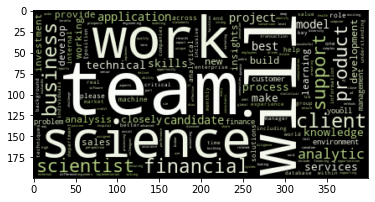

In [517]:
#allows us to change color of wordcloud 
#source: https://amueller.github.io/word_cloud/auto_examples/a_new_hope.html
def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(82, 44%%, %d%%)" % random.randint(60, 100)

#Generates Wordcloud from count dataframe 
def create_count_string(df):
    #Generate string with keywords appearing a corresponding amount of times
    index = list(df.index)
    out = ''
    for word in index:
        out = out + ' ' + f'{word} ' * int(df.loc[word][0])
    #Shuffle string for proper wordcloud interpretation 
    s = out
    l = s.split()
    random.shuffle(l)
    s = ' '.join(l)
    #Plot wordcloud of shuffled string
    wc = WordCloud().generate(s)
    plt.imshow(wc.recolor(color_func=grey_color_func, random_state=3),
            interpolation="bilinear")


In [ ]:
create_count_string(remove_out_desc)

Will Team Work

The above words seem to be key features in describing a position. The results ar every intuative and our filtering seems to have provided with good quality data.

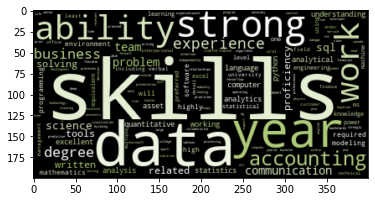

In [518]:
create_count_string(remove_out_qual)

Now in the qualifications set we see a strong indication for data skills ability

These are all terms describing what an employer would require of prospects.

Seems like our data has been properly cleansed